# Home Assignment No. 1

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

To begin with, let's import the essential (for this assignment) libraries.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.datasets import make_moons, make_circles

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [337]:
# Your imports
from mlxtend.plotting import plot_decision_regions

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, QuantileTransformer, FunctionTransformer, MinMaxScaler
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse

from sklearn.model_selection import GridSearchCV, PredefinedSplit

import time

import warnings
warnings.filterwarnings('ignore')

# my additional imports
import itertools
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve

## Task 1. Numpy Problem 1 (1 point)

Write a function, which takes a matrix `arr` and shift by mean and scale by standard deviation each column. Check [this](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html)
out for documentation.

In [395]:
def normalize(arr):
    """Shift by mean and scale by standard deviation each column of a matrix.

    Parameters
    ----------
    arr : array, shape = (n_rows, n_cols)
        The matrix, the columns of which to normalize.

    Returns
    ----------
    out : array, shape = (n_rows, n_cols)
        The final column-centered matrix.
    """
    assert arr.ndim == 2
    n_rows, n_cols = arr.shape

    ### BEGIN Solution (do not delete this comment)
    out = (arr - arr.mean(axis=0)) / arr.std(axis=0)
    ### END Solution (do not delete this comment)

    return out

## Task 2. Numpy Problem 2 (1 point)

Plot the **Hypotrochoid** given by the following equation:
$$\begin{cases}
x(t)=(R - r) \cdot \cos(t) + d \cdot \cos\bigg(\frac{R - r}{r}\cdot t\bigg)\\
y(t)=(R - r) \cdot \sin(t) - d \cdot \sin\bigg(\frac{R - r}{r}\cdot t\bigg)
\end{cases}, 0\leq t\leq 2\pi\cdot \frac{LCM(r, R)}{R};$$
(LCM - Least Common Multiple)
with all possible values of $(R,r,d)$ if $R\in\{5,9\}$, $r\in\{2,3\}$, $d\in\{3,4\}$.

Make sure that each plot has different color.

To compute LCM you can use `math.gcd` and relationship between LCM and GCD

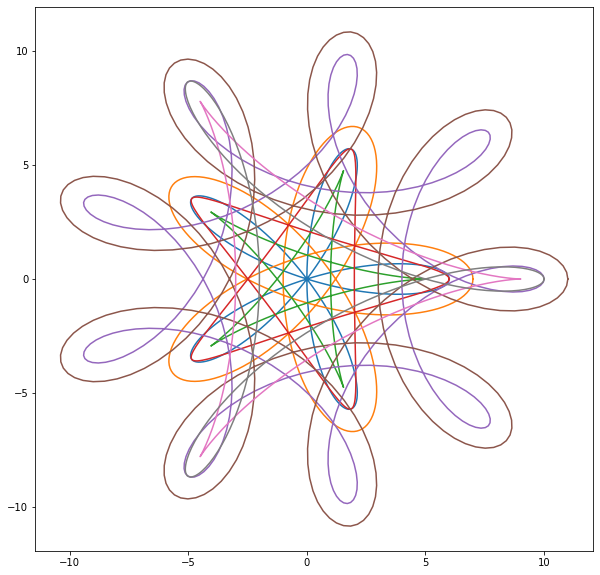

In [6]:
### BEGIN Solution (do not delete this comment)

R = [5, 9]
r = [2, 3]
d = [3, 4]

fig, ax = plt.subplots(figsize=(10, 10))

for R, r, d in list(itertools.product(R, r, d)):
    time = np.linspace(0, 2 * np.pi * np.lcm(r, R) / R, 300)  
    x_t = [(R - r) * np.cos(t) + d * np.cos(t * (R - r) / r) for t in time]
    y_t = [(R - r) * np.sin(t) - d * np.sin(t * (R - r) / r) for t in time]
    ax.plot(x_t, y_t)
    
### END Solution (do not delete this comment)

## Task 3. Matplotlib (1 points)

Plot the level sets of the $l^p$ norm (actually, this is not a norm for $p<1$)
\begin{equation}
    \|z\|_p = \biggl(\sum_i \lvert x_i\rvert^p\biggr)^\tfrac1{p}
        \,,
\end{equation}
and make the contour of the unit ball in $l^p$ norm stand out. Draw plots
for $p \in \{0, \tfrac1{20}, \tfrac14, \tfrac12, 1, 1.5, 2, 5, 10, \infty\}$.

Study plotting examples on [this](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf) and [this](http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html) pages (**especially the last one**) and have a look at these functions: *np.meshgrid*, *np.linspace* in numpy's documentation. We suggest to use `np.linalg.norm`.

Try to produce a plot that **looks like the one below**:

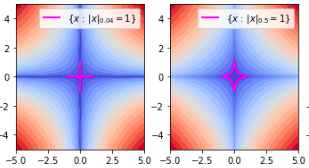

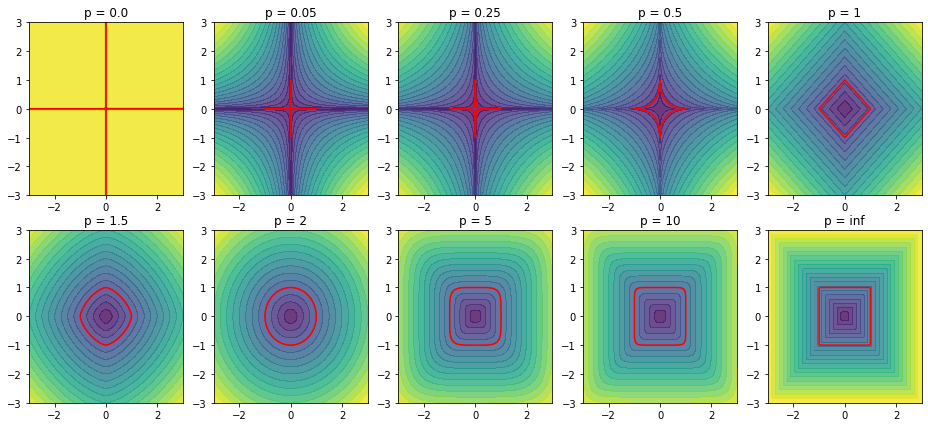

In [7]:
p_values = [0., 0.05, 0.25, 0.5, 1, 1.5, 2, 5, 10, np.inf]
xx, yy = np.meshgrid(np.linspace(-3, 3, num=101),
                     np.linspace(-3, 3, num=101))

n_rows, n_cols = xx.shape

fig, ax = plt.subplots(ncols=(len(p_values) + 1)// 2,
                         nrows=2, figsize=(16, 7))

for p, ax in zip(p_values, ax.flat):
    ### BEGIN Solution (do not delete this comment)
    
    zz = np.linalg.norm([xx.flatten(), yy.flatten()], ord=p, axis=0).reshape(n_rows, n_cols)
    ax.contourf(xx, yy, zz, levels=20, alpha=.8)
    ax.contour(xx, yy, zz, levels=[1], colors='r')
    ax.set_title(f'p = {p}')
    
    ### END Solution (do not delete this comment)
plt.show()

## Task 4. Decision Rules and Feature Engineering (1+1 points)

In this task, your goal is to visualize the decision rules of several classifiers applied to an artificial $2$-dimensional dataset inspired by the dataset that can be created using the built-in `sklearn.datasets` method called `make_moons`. The main difference is a sun added outside the moons. In the cell below we generate the dataset.

In [8]:
def make_sunny_moons(n_sun=50, n_moons=100, noise=0.0, sun_radius=1.9, theta=None):
    X_moons, y_moons = make_moons(n_samples=n_moons, noise=noise, random_state=0xC0FFEE)
    if not n_sun:
        return X_moons, y_moons
    
    np.random.seed(0xC0FFEE)
    angles = np.arange(0, 2 * np.pi, 2 * np.pi / n_sun)
    X_sun = sun_radius * np.column_stack([np.cos(angles), np.sin(angles)]) + np.array([0.5, 0.25])
    X_sun += np.random.normal(scale=noise, size=X_sun.shape)
    y_sun = 2 * np.ones(n_sun)

    X = np.vstack([X_moons, X_sun])
    y = np.concatenate([y_moons, y_sun]).astype(int)
    X -= X.mean(axis=0)

    if theta is None:
        theta = np.pi / 4
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    X = X @ R
    
    return X, y

X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)

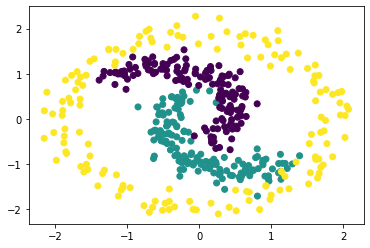

In [9]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

### Subproblem 4.1. Decision Rule Plotting (1 point)

The goal of the subproblem is to fit the following classifiers on features `X` to target `y`:
* Decision Tree (single!) with small depth ($\leq 4$);
* Random Forest with a small number of trees ($\leq 20$) of small depth ($\leq 4$);
* Logistic Regression;
* Support Vector Machine with RBF kernel;
* Gaussian Naive Bayes;
* k-Nearest Neighbor Classifier with a small number of neighbors (e.g. $5$);

For all the fitted classifiers you have to plot the decision regions (the example is shown below the cell). Each plot must have **Title** which contains the name of the classifier and its accuracy (only **two** decimal places) on the data.

You can write the plotting code on your own, but we highly recommend just to use `mlxtend` library (`pip install mlxtend` in linux terminal), which has an awesome one-line decision rule plotting function (you are to [google](http://google.com) it).

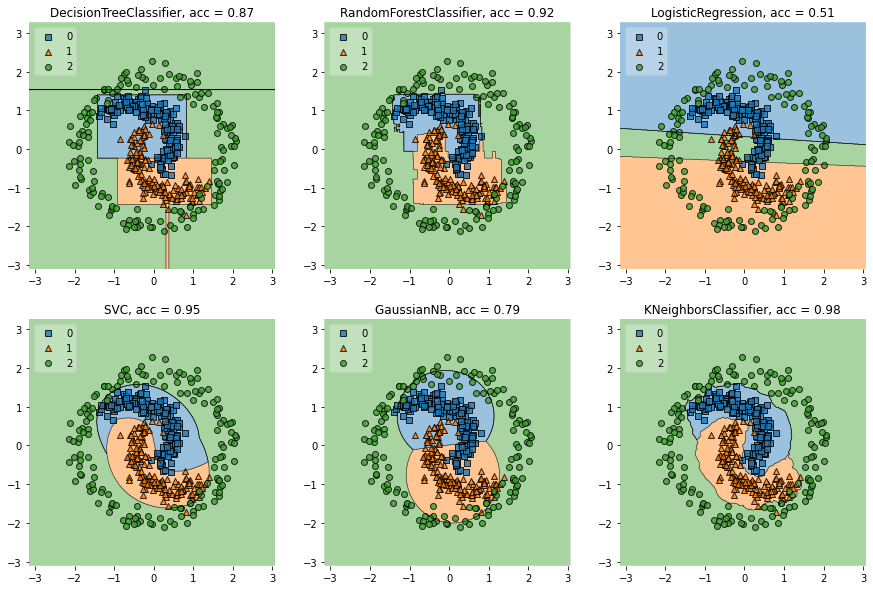

In [10]:
### BEGIN Solution (do not delete this comment)

# inspired by https://github.com/rasbt/mlxtend
import matplotlib.gridspec as gridspec


# Initializing Classifiers
clf1 = DecisionTreeClassifier(random_state=0, max_depth=4)
clf2 = RandomForestClassifier(random_state=0, max_depth=4, n_estimators=20)
clf3 = LogisticRegression(random_state=0)
clf4 = SVC(random_state=0, kernel='rbf')
clf5 = GaussianNB()
clf6 = KNeighborsClassifier(n_neighbors=5)

clfs = [clf1, clf2, clf3, clf4, clf5, clf6]
titles = ['DecisionTreeClassifier',
          'RandomForestClassifier', 
          'LogisticRegression', 
          'SVC', 
          'GaussianNB', 
          'KNeighborsClassifier']

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(15, 10))

for clf, title, grd in zip(clfs, titles, itertools.product([0, 1], [0, 1, 2])):
    clf.fit(X, y)
    acc = clf.score(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(f'{title}, acc = {acc:.2f}')
plt.show()
### END Solution (do not delete this comment)

### Subproblem 4.2. Pipeline: Fitting to Data by Feature Engineering (1 point)
In previous task 4.1 several classifiers obviously failed fitting to data. This happened because the decision rule of the classifier has a restricted form (e.g. linear for linear models), while the data is more complicated.

One may try to change the parameters of the classifier (e.g. increase the number of trees in Forest) in order to improve accuracy, but some models (especially linear) do not have parameters that can change the form of the decision rule.

In this case the **feature engineering** helps: one may try to compute new (e.g. non-linear) features based on the existing pool and fit the classifier in the new features. This may help low-complex classifiers to fit to hard data dependencies.

Your task it to
* Choose **two classifiers** from the previous problem among Decision Tree, Random Forest, Naive Bayes, Logistic Regression;
* By generating of additional features (e.g. polynomial) make them achieve accuracy $>0.95$.
* For each classifier, write 2-3 sentences about why did you choose these features.
* Plot their decision rules in the original feature space.

It is your choice how to generate features. You may create hand-crafted features and add them manually. Nevertheless, we **highly suggest** to get used to and apply the following builtin `sklearn` methods:
* `PolynomialFeatures`, `GaussianRandomProjection` among others - for feature generation
* `StandartScaler`, `MinMaxScaler` among others - for feature scaling
* `Pipeline` - for combining several operations in a row (e.g. feature creation & prediction)

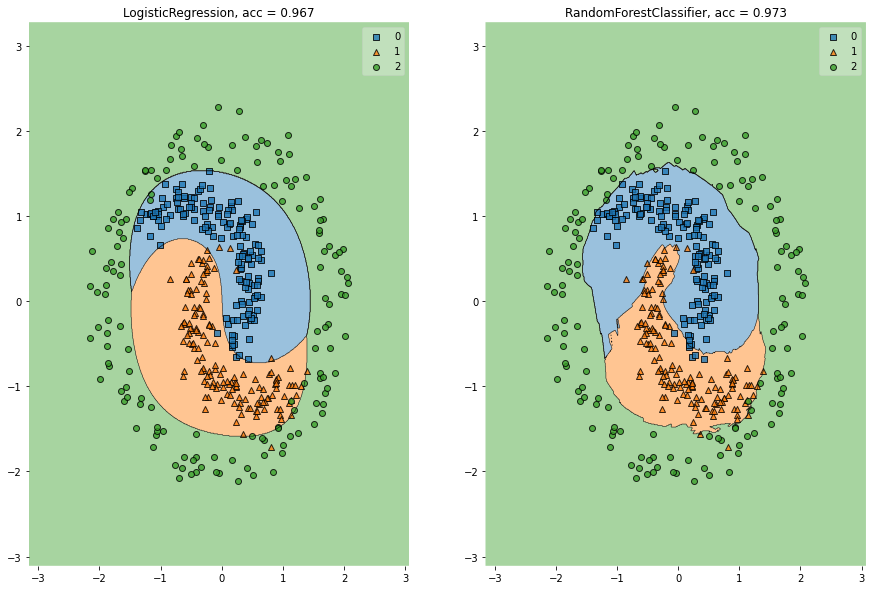

In [11]:
### BEGIN Solution (do not delete this comment)

# Initializing Classifiers
rf = RandomForestClassifier(random_state=0, max_depth=4, n_estimators=20)
lr = LogisticRegression(random_state=0)

# kinda feature engineering part
poly_feature = PolynomialFeatures(4)
gaussian_proj = GaussianRandomProjection(n_components=10, random_state=0)
scaler = StandardScaler()

fig, ax = plt.subplots(1, 2, figsize=(15, 10))

# LogisticRegression
lr_pipe = Pipeline([('poly_feature', poly_feature), 
                    ('log_reg', lr)])
lr_pipe.fit(X, y)
lr_acc = lr_pipe.score(X, y)
fig = plot_decision_regions(X=X, y=y, ax=ax[0], clf=lr_pipe)
ax[0].set_title(f'LogisticRegression, acc = {lr_acc:.3f}')


# RandomForestClassifier
rf_pipe = Pipeline([('poly_feature', poly_feature), 
                    ('gaussian_proj', gaussian_proj),
                    ('log_reg', rf)])
rf_pipe.fit(X, y)
rf_acc = rf_pipe.score(X, y)
fig = plot_decision_regions(X=X, y=y, ax=ax[1], clf=rf_pipe)
ax[1].set_title(f'RandomForestClassifier, acc = {rf_acc:.3f}')


plt.show()

### END Solution (do not delete this comment)

**Your text answer (do not delete this comment)**:

1. **LogisticRegression**. For logistic regression it is reasonable to add new features by `PolynomialFeatures`. The reason for that is including new interconnections between features helps a regression model to find and catch new patterns in dataset. So, by increasing the polynomial degree, we increase the amount of new information which leads to better accuracy. The optimal parameter is `degree=4` which means now `num_features=15`.

2. **RandomForestClassifier**. For RF it is not enough just to add new features to the dataset, so I used `GaussianRandomProjection` approach to increase accuracy of this model. This technique map initial features space to the space of features of a lower dimension, selecting the most of information from initial dataset. The optimal parameter is `n_components=10`. So, we kinda map from `dim=15` space to the `dim=10` space.


## Task 5. Bagging Ensembles of Regressors (1+1 points)
In this problem, you are to deal with [Concrete Compressive Strength Dataset](https://www.kaggle.com/elikplim/concrete-compressive-strength-data-set). Your goal will be to determine the optimal parameters for two Bagging-Based Forest Ensemble **Regressors** and compare the forests. Let's load the data and split it into test and train parts.

In [436]:
data = pd.read_csv('data/concrete.csv').astype(float)
X = data.drop('concrete_compressive_strength', axis=1)
y = data.concrete_compressive_strength
n = len(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=int(n*0.15), random_state=0xC0FFEE)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=int(n*0.15), random_state=0xC0FFEE)

data.sample(3).sort_index()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
295,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
409,167.4,129.9,128.6,175.5,7.8,1006.3,746.6,3.0,14.94
413,173.8,93.4,159.9,172.3,9.7,1007.2,746.6,3.0,15.82


Please note that both in Task 4 the whole data was the Train Data. In Task 4 the output score (accuracy) was the **train** score (i.e. the score on the train data of the model fitted on the same data).

In this problem, we do a step further and split the whole data into the **train part** (on which we train), **validation part** (on which we tune hyperparameters) and **test part** (where we compute the final test score on the validated model).

In this problem, you are to consider the `RandomForestRegressor` and `ExtraTreesRegressor` models for the prediction of concrete compressive strength under **squared loss function** (mean squared error). Recall that Random Forest was discussed in the lectures. [Extremely Randomized Forest](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.65.7485&rep=rep1&type=pdf) is another bootstrapped forest with a simple tree building algorithm. Basically, each split of each tree node is chosen at random both w.r.t. feature and threshold (while in the random forest the split minimizes impurity).

### Subproblem 5.1. Hyperparameters tuning (1 point)

* For both Forests perform the Grid Search (on the validation data) over most important algorithm's parameters (what are they?) to determine the optimal hyperparameters.
* For the optimal hyperparameters output the train score, the validation score and the test score (use the model with best hyperparameters refitted on the train set).

In [477]:
### BEGIN Solution (do not delete this comment)

def grid_search(estimator, params, data, cv):
    
    clf = GridSearchCV(estimator, 
                       param_grid=params, 
                       cv=cv, 
                       scoring='neg_mean_squared_error', 
                       refit=False
                      )
    
    clf.fit(*data['train_val'])
#     print('params: ', clf.best_params_)
    return clf.best_params_ #train_score, val_score, test_score

def get_score(model, data):
    
    model.fit(*data['train'])
    
    y_pred_train = model.predict(data['train'][0])
    train_score = mse(y_pred_train, data['train'][1])
    
    y_pred_val = model.predict(data['val'][0])
    val_score = mse(y_pred_val, data['val'][1])
    
    y_pred_test = model.predict(data['test'][0])
    test_score = mse(y_pred_test, data['test'][1])
    
    return train_score, val_score, test_score


random_forest = RandomForestRegressor(random_state=0)
extra_tree = ExtraTreesRegressor(random_state=0)

params = {'n_estimators': [1, 5, 10, 100, 200, 300, 500],
          'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 30, 40]}

data = {'train_val': (X_train_val, y_train_val),
        'train': (X_train, y_train), 
        'val': (X_val, y_val), 
        'test': (X_test, y_test)}

# indexes of validation part of data
val_idxs = [-1 if x in X_train.index else 0 for x in X_train_val.index]
ps = PredefinedSplit(val_idxs)


# RandomForestRegressor

rf_best_params = grid_search(random_forest, params, data, ps)
rf_model = RandomForestRegressor(random_state=0, **rf_best_params)
rf_train_score, rf_val_score, rf_test_score = get_score(rf_model, data)
print(f'RandomForest:')
print(f'\t train_score = {rf_train_score}')
print(f'\t val_score = {rf_val_score}')
print(f'\t test_score = {rf_test_score}\n')

# ExtraTreesRegressor
et_best_params = grid_search(extra_tree, params, data, ps)
et_model = ExtraTreesRegressor(random_state=0, **et_best_params)
et_train_score, et_val_score, et_test_score = get_score(et_model, data)
print(f'ExtraTreesRegressor:')
print(f'\t train_score = {et_train_score}')
print(f'\t val_score = {et_val_score}')
print(f'\t test_score = {et_test_score}')

### END Solution (do not delete this comment)

RandomForest:
	 train_score = 4.926348594289803
	 val_score = 21.75669384728541
	 test_score = 27.598107562380747

ExtraTreesRegressor:
	 train_score = 1.3750514723641534
	 val_score = 17.15852332853974
	 test_score = 23.33087466865706


### Subproblem 5.2. Results explanation (1 point) 

* Compare the obtained scores. Explain, why the scores differ a lot for train and validation/test.
* Which of the algorithms perform better on the training set? Explain why!

**Your text answer (do not delete this comment)**:

* From the results above we can see that Extra tree regressor get the better score compare to Random forest. Moreove, it is easy to see that both models have the tendecy to be overfitted. The reason for that is that during training part Random Forest and Extra tree regressor fit exactly training data and kinda memorize it. Since the model did not see both validation and test samples the score obtained from it is much worse that on the train data. However, it should be noted that the score obtained on the validation is better than on the test. This situation can be explained by the fact that we tune our hyperparameters on validation data and our model has a little more understanding about what the validation data is and thus gives better score.

* As I've said before Extra tree regressor perform better than Random forest. The reason for that can be the fact that Extra tree regressor is more randomized algorithm rather than Random forest and therefore obtain lower variance, so, for this dataset it gives better results.

## Task 6. Boosting (1+1 points)


> Boosting Machines (BM) is a family of widely popular and effective methods for classification and regression tasks. The main idea behind BMs is that **combining weak learners**, which perform slightly better than random, can result in **strong learning models**.

> AdaBoost utilizes the greedy training approach: firstly, we train the weak learners (they are later called `base_classifiers`) on the whole dataset and in the next iterations we train the model on the samples, on the which the previous models have performed poorly. This behavior is achieved by reweighting the training samples during each algorithm's step.

#### The task:

In this exercise you will be asked to implement one of the earlier variants of BMs - **AdaBoost** and compare it to the already existing `sklearn` implementation. The key steps are:

* Complete the `ada_boost_alpha` and `ada_boost_distribution` functions

* Complete the `.fit` method of `Boosting` class

* Complete the `.predict` method of `Boosting` class

The pseudocode for AdaBoost can be found in lectures.

For `ada_boost_distribution` please use another pseudocode, that used for `sklearn` realization:
$$
\begin{align}
&\textbf{for } i \gets 1 \textbf{ to } m \textbf{ do}\\
&\;\;\;\;w_{i,t+1}\gets w_{i,t}\exp(-\alpha_t y_t h_t(\mathbf{x}_i))\\
&C = \sum_{j=1}^m w_{j,t+1}\\
&\textbf{for } i \gets 1 \textbf{ to } m \textbf{ do}\\
&\;\;\;\;\tilde{w}_{i,t+1}\gets \tfrac{1}{C}w_{i,t+1}
\end{align}
$$

##### criteria

the decision boundary of the final implementation should look reasonably identical to the model from `sklearn`, and should achieve accuracy close to `scikit` :

$$
    |\text{your_accuracy} - \text{sklearn_accuracy}| \leq 0.005
\,. $$

In [396]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [397]:
### Plot the dataset

X, y = make_moons(n_samples=1000, noise=0.3, random_state=0xC0FFEE)

# for convenience convert labels from {0, 1} to {-1, 1}
y[y == 0] = -1

In [398]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0xC0FFEE)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30),
                     np.linspace(y_min, y_max, 30))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

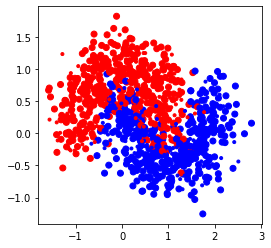

In [399]:
# Plot the training points
plt.figure(figsize=(4, 4))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='.', c=y_test, cmap=cm_bright)
plt.show()

In [400]:
from sklearn.tree import DecisionTreeClassifier # base classifier

### Subproblem 6.1. AdaBoost alphas and distributions (1 point)

Now let us define functions to calculate alphas and distributions for AdaBoost algorithm

In [409]:
def ada_boost_alpha(y, y_pred_t, distribution):
    """
    Function, which calculates the weights of the linear combination of the classifiers.
    
    y_pred_t is a prediction of the t-th base classifier
    """
    ### BEGIN Solution (do not delete this comment)
    
    indicator = y * y_pred_t < 0
    N_t = np.sum(distribution * indicator)
    alpha = 0.5 * np.log((1 - N_t) / N_t)
    
    ### END Solution (do not delete this comment)

    return alpha

def ada_boost_distribution(y, y_pred_t, distribution, alpha_t):
    """
    Function, which calculates sample weights
    
    y_pred_t is a prediction of the t-th base classifier
    """
    ### BEGIN Solution (do not delete this comment)
        
    distribution = distribution * np.exp(-(alpha_t * y * y_pred_t))
    norm_const = np.sum(distribution)
    distribution = distribution / norm_const
    
    ### END Solution (do not delete this comment)

    return distribution

### Subproblem 6.2. Boosting implementation (1 point)

Implement your own AdaBoost algorithm. Then compare it with the `sklearn` implementation.

In [410]:
class Boosting():
    """
    Generic class for construction of boosting models
    
    :param n_estimators: int, number of estimators (number of boosting rounds)
    :param base_classifier: callable, a function that creates a weak estimator. Weak estimator should support sample_weight argument
    :param get_alpha: callable, a function, that calculates new alpha given current distribution, prediction of the t-th base estimator,
                      boosting prediction at step (t-1) and actual labels
    :param get_distribution: callable, a function, that calculates samples weights given current distribution, prediction, alphas and actual labels
    """
    def __init__(self, n_estimators=50, base_classifier=None,
                 get_alpha=ada_boost_alpha, update_distribution=ada_boost_distribution):
        self.n_estimators = n_estimators
        self.base_classifier = base_classifier
        self.get_alpha = get_alpha
        self.update_distribution = update_distribution
        
    def fit(self, X, y):
        n_samples = len(X)
        distribution = np.ones(n_samples, dtype=float) / n_samples
        self.classifiers = []
        self.alphas = []
        for i in range(self.n_estimators):
            # create a new classifier
            self.classifiers.append(self.base_classifier())
            self.classifiers[-1].fit(X, y, sample_weight=distribution)

            ### BEGIN Solution (do not delete this comment)
            
            # make a prediction
            y_pred_t = self.classifiers[-1].predict(X)
            
            # update alphas, append new alpha to self.alphas
            self.alphas.append(self.get_alpha(y, y_pred_t, distribution))
            
            # update distribution and normalize
            distribution = self.update_distribution(y, y_pred_t, distribution, self.alphas[-1])
            
            ### END Solution (do not delete this comment)

    
    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])
    
        ### BEGIN Solution (do not delete this comment)
        
        
        #get the weighted votes of the classifiers
        for i in range(len(self.classifiers)):
            final_predictions += self.alphas[i] * self.classifiers[i].predict(X)
        out = np.sign(final_predictions)
        
        ### END Solution (do not delete this comment)

        return out

In [411]:
from sklearn.ensemble import AdaBoostClassifier

max_depth = 5
n_estimators = 100

get_base_clf = lambda: DecisionTreeClassifier(max_depth=max_depth)
ada_boost = Boosting(n_estimators=n_estimators,
                     base_classifier=get_base_clf)
ada_boost.fit(X_train, y_train)

ada_boost_sklearn = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                                       algorithm="SAMME",
                                       n_estimators=n_estimators)

ada_boost_sklearn.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=100)

In [412]:
classifiers = [ada_boost, ada_boost_sklearn]
names = ['ada_boost', 'ada_boost_sklearn']

accuracy ada_boost: 0.895
accuracy ada_boost_sklearn: 0.89


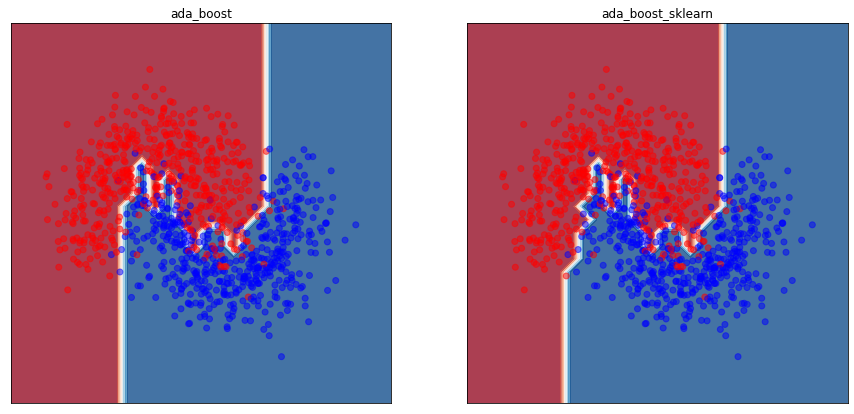

In [413]:
# # test ensemble classifier
plt.figure(figsize=(15, 7))
for i, clf in enumerate(classifiers):
    prediction = clf.predict(X_test)

    # Put the result into a color plot
    ax = plt.subplot(1, len(classifiers), i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.5)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(names[i])

    print('accuracy {}: {}'.format(names[i], (prediction == y_test).sum() * 1. / len(y_test)))

## Task 7. Gradient Boosting (1+1 point)

Gradient Boosting Machines (GBM) is a historical and logical continuation of the first boosting algorithms. In a way, one can consider AdaBoost as another variant of GBMs. These methods are extremely powerful tools, widely used in industry, research and various machine learning competitions. 

In this task we offer to focus on one variant of GBM called [XGBoost](https://github.com/dmlc/xgboost/tree/master/python-package). The dataset that is going to be used is  [Telecom Churn Dataset] (https://www.kaggle.com/becksddf/churn-in-telecoms-dataset).

Make sure that you have installed the XGBoost package before starting the task. 

In [480]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('data/telecom_churn.csv')
cols = ['account length','number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn']
data = data[cols]
data.iloc[:,-1] = pd.Categorical(data.iloc[:,-1])
data.iloc[:,-1] = data.iloc[:,-1].cat.codes
X, y = data.iloc[:,:-1], data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0xC0FFEE)

### Subproblem 7.1. XGBoost vs. Random Forest (1 point)

 You will need to construct an XGBoost classification model, train it, plot the ROC curve, measure the training time and compare it to Random Forest.

* train the XGBoost classifier on the provided dataset
* measure the training time
* measure the average precision score on the test set
* plot ROC-curve
* repeat the previous steps for Random Forest classifier

**HINT**: use ```time.perf_counter()``` to measure time.

[23:28:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training time for xgb: 0.14719521799997892
Average precision score for XGBoost: 0.6890433304965553
Training time for xgb: 0.3204363039985765
Average precision score for Random Forest: 0.7092917681542551


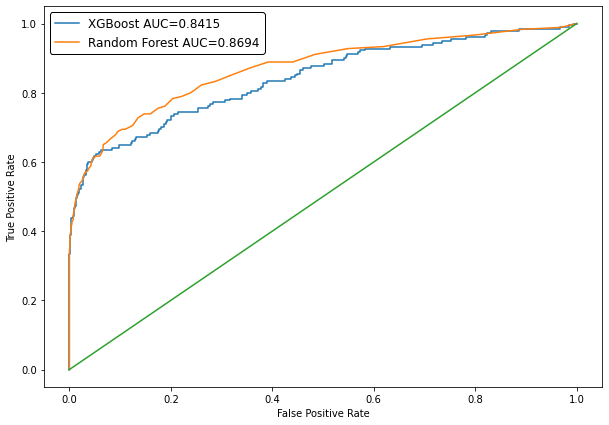

In [483]:
### BEGIN Solution (do not delete this comment)

# XGBoost
xgb_clf = XGBClassifier(random_state=10)

# measure the training time
time_start = time.perf_counter()
xgb_clf.fit(X_train, y_train)
time_end = time.perf_counter()

# make predict
y_pred_xgb = xgb_clf.predict_proba(X_test)[:, 1]

# results
print('Training time for xgb:', time_end - time_start)
print('Average precision score for XGBoost:', average_precision_score(y_test, y_pred_xgb))


# Random Forest
rf_clf = RandomForestClassifier(random_state=10)

# measure the training time
time_start = time.perf_counter()
rf_clf.fit(X_train, y_train)
time_end = time.perf_counter()

# make predict
y_pred_rf = rf_clf.predict_proba(X_test)[:, 1]

# results
print('Training time for xgb:', time_end - time_start)
print('Average precision score for Random Forest:', average_precision_score(y_test, y_pred_rf))

# plot ROC-AUC curve
plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_test, y_pred_xgb)[:2], label='XGBoost AUC={:.4f}'.format(roc_auc_score(y_test, y_pred_xgb)))
plt.plot(*roc_curve(y_test, y_pred_rf)[:2], label='Random Forest AUC={:.4f}'.format(roc_auc_score(y_test, y_pred_rf)))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### END Solution (do not delete this comment)

### Subproblem 7.2. Feature importances (1 point)

Extract and compare the feature importances calculated by the previously trained XGBoost and Random Forest Classifiers.

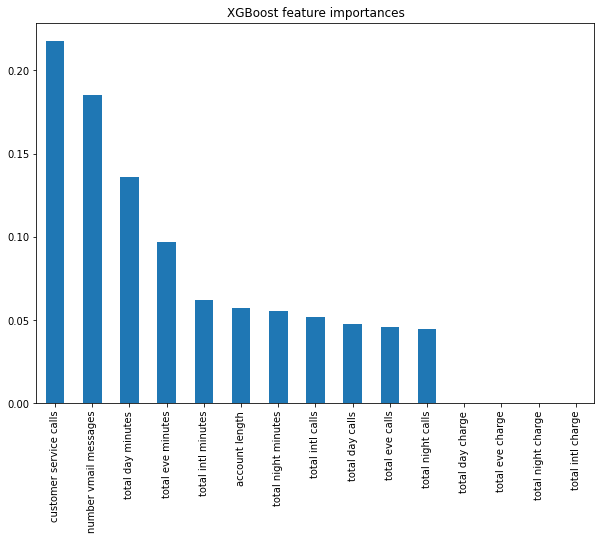

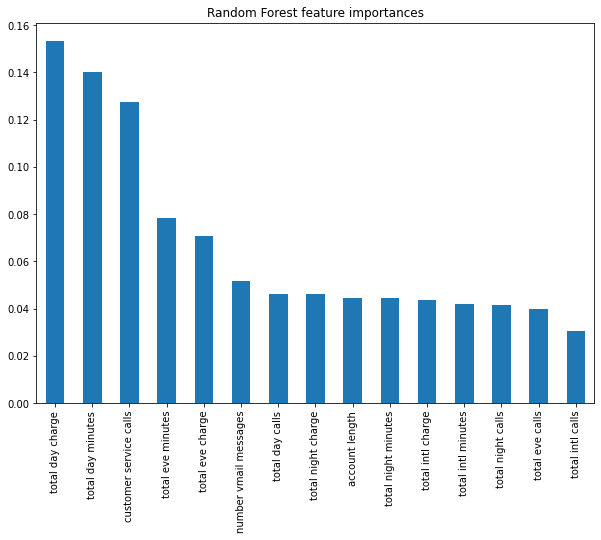

In [484]:
### BEGIN Solution (do not delete this comment)

# XGBoost feature importances
plt.figure(figsize=(10,7))
fi = pd.Series(xgb_clf.feature_importances_, index=data.columns[:-1])
fi.sort_values(ascending=False).plot(kind='bar')
plt.title('XGBoost feature importances')
plt.show()


# Random Forest feature importances
plt.figure(figsize=(10,7))
fi = pd.Series(rf_clf.feature_importances_, index=data.columns[:-1])
fi.sort_values(ascending=False).plot(kind='bar')
plt.title('Random Forest feature importances')
plt.show()

### END Solution (do not delete this comment)

Are they different or the same, why?

**Your text answer (do not delete this comment)**:

Fro, the histogram above we can see that feature importance distribution is different for XGBoost and Random forest models. Some features which is important for one model does not affect the importance of features for another model and vice versa. For example, feature `total day charge` has a very big weight for Random forest (second most important feature) but at the same time it is absolutely not important for XGBoost model (has almost zero weight). And feature `number vmail messages`, second most important feature for XGBoost, only top-6 for Random forest.

Also, it is important to note that for Random forest if we change the `random_seed` parameter we get a bit different feature importance distribution. It is can be explained by the fact that there is some correlation between features in initial dataset. So, we can obtain the same results with different feature importance distribution in case of Random forest. However, for XGBoost feature importance distribution remain the same no matter how we change `random_seed` parameter. So, we can conclude that XGBoost is able to cope with correlation dataset, unlike Random Forest.